In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, re

In [11]:
slst = "../Data/trim.slst"
sta=np.loadtxt(slst,dtype='str')
sta_num=len(sta)
print("number of station: ",sta_num,"\nStation: ",sta)


number of station:  23 
Station:  ['BGU' 'BRPU' 'BSUT' 'CTU' 'CVRU' 'DUG' 'FOR1' 'FORU' 'HMU' 'HWUT' 'JLU'
 'LCMT' 'LIUT' 'MPU' 'NOQ' 'PNSU' 'PSUT' 'RDMU' 'SPU' 'SRU' 'SZCU' 'TCRU'
 'TCU']


In [12]:
usecols=["utvec", "dv", "err", "temp", "SM_EWT", "date"]
root = "../Data/"

file_loc = open("../Data/sta.loc", "r")

for sk in range(sta_num):
    stnm=sta[sk].strip()
    for line in file_loc:
        if re.search(stnm, line):
            loc=line.strip()
            break
    
    fn = root+"INTERP_"+stnm+".csv"
    fi = pd.read_csv(fn,names=usecols,header=0)
    
    fi.drop(columns=['err','date'])
   
    fi.dv = fi.dv/np.max(np.abs(fi.dv))
    fi.temp = fi.temp - np.mean(fi.temp)
    fi.temp = fi.temp/np.max(np.abs(fi.temp))
    fi.SM_EWT = fi.SM_EWT - np.mean(fi.SM_EWT)
    fi.SM_EWT = fi.SM_EWT/np.max(np.abs(fi.SM_EWT))
    
    # only remaining data happens after 2012
    index=np.where(fi.utvec > 2012)[0][0]
    fi2=fi[index:]
    # concatenate data
    if sk == 0:
        fnall=fi2
    else:
        fnall=pd.concat([fnall, fi2], ignore_index=True)
    
file_loc.close()

# save concatenated data
df=pd.DataFrame({
    'utvec': fnall.utvec,
    'dv':fnall.dv,
    'temp':fnall.temp,
    'SM_EWT':fnall.SM_EWT,
})
df.to_csv('Concat_data.csv')
fnall=fnall.drop(columns=['err','date'])

In [13]:
fnall.head()

,utvec,dv,temp,SM_EWT
0,2012.001343,-0.429600,-0.772676,-0.109289
1,2012.004150,-0.426000,-0.767197,-0.107831
2,2012.006836,-0.429388,-0.761350,-0.106395
3,2012.009521,-0.433199,-0.754590,-0.104843
4,2012.012329,-0.436799,-0.745197,-0.103315


In [14]:
fnall.describe()

,utvec,dv,temp,SM_EWT
count,76026.000000,76026.000000,76026.000000,76026.000000
mean,2017.750611,0.011822,0.007567,-0.004981
std,2.963201,0.377081,0.572738,0.368145
min,2012.001343,-1.000000,-1.000000,-1.000000
25%,2015.316895,-0.253556,-0.522783,-0.262223
50%,2017.980835,0.018092,-0.051548,-0.035909
75%,2020.261475,0.276554,0.558870,0.234864
max,2022.624268,1.000000,1.000000,1.000000


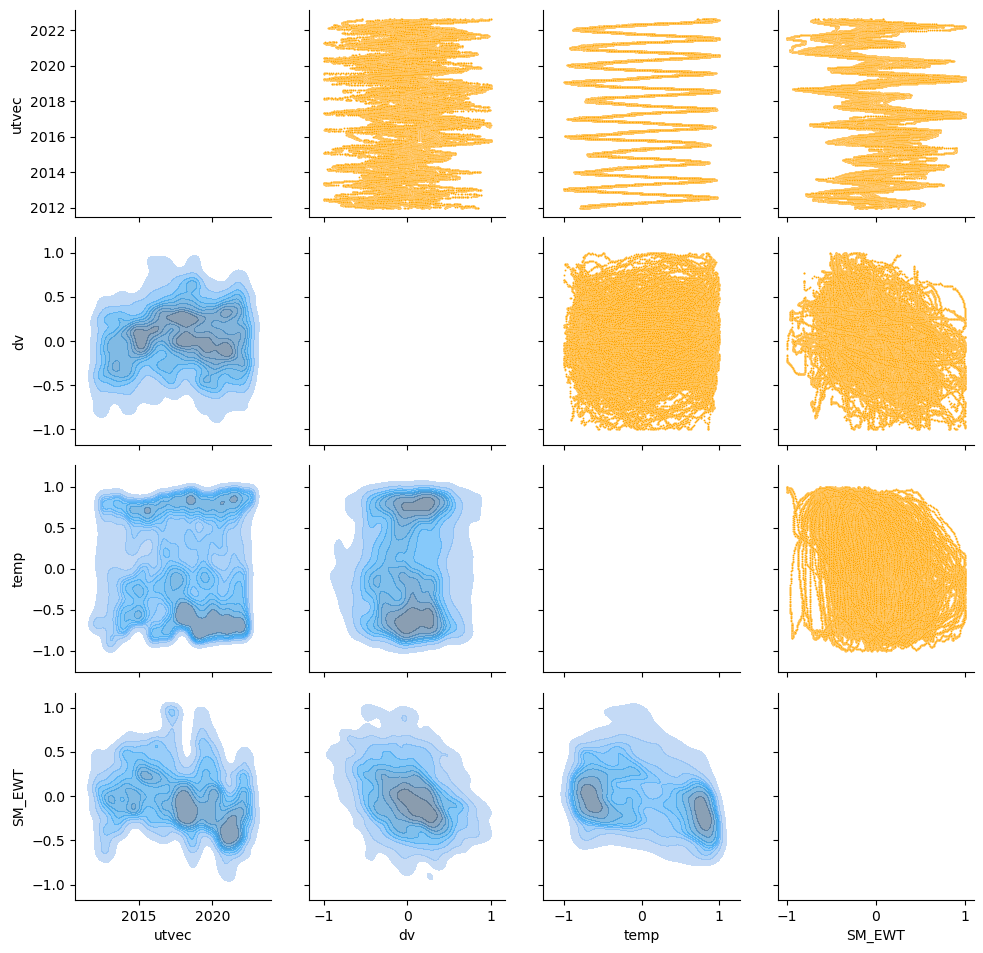

In [15]:
import seaborn as sns
g = sns.PairGrid(fnall)
g.map_upper(sns.scatterplot, s=2, color='orange')
g.map_lower(sns.kdeplot, fill=True, alpha=0.6)
#g.map_diag(sns.histplot, kde=True, bins='auto', data=list(fnall))
g.fig.subplots_adjust(top=0.95)